In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

class future_exchange:
    D_1 = 1.0
    D_2 = 1.0
    D_3 = 0
    Nominal_D_3 = 0
    
    S_1 = 1.0
    S_2 = 1.0
    
    p = 0
    r = 0
    l = 0
    
    c = [0,0,0,0]

    def __init__(self, r, l):
        self.r = r
        self.l = l

    def updateRate(self, x):
        self.p = x
    
    def openLong(self, x):
        self.D_1 += x
        self.S_1 += x
    
    def openShort(self, x):
        self.D_2 += x
        self.S_2 += 1.0 * x * self.p
        
    def closeLong(self, x):
        profit = 1.0 * x * self.D_1 / self.S_1
        if self.S_1 >= x and self.D_1 >= profit:
            self.S_1 -= x
            self.D_1 -= profit
        #print(self.S_1, self.D_1)
        
    def closeShort(self, x):
        profit = 1.0 * x * self.D_2 / self.S_2
        if self.S_2 >= x and self.D_2 >= profit:
            self.S_2 -= x
            self.D_2 -= profit
        
        if self.S_2 < 0:
            print("here1", x, self.S_2)
        
    def longRate(self):
        return 1.0 * self.p * self.D_1 / self.S_1
        
    def longRateInAsset(self):
        return 1.0 * self.D_1 / self.S_1

    def shortRate(self):
        return 1.0 * self.S_2 / self.D_2
        
    def addLiquidity(self, x):
        self.D_3 += x
        self.Nominal_D_3 += x
        
    def removeLiquidity(self, x):
        if self.D_3 > x and self.Nominal_D_3 > x:
            self.D_3 -= x
            self.Nominal_D_3 -= x
        
    def remargin(self):
        #print("here", self.D_1, self.D_2, self.D_3, self.S_1, self.S_2)
        D = self.D_1 + self.D_2 + self.D_3
        min_D_1 = 1.0 * self.S_1 * self.r
        min_D_3 = 1.0 * self.Nominal_D_3 * self.l
        
        target_D_1 = self.S_1
        target_D_2 = 1.0 * self.S_2 / self.p
        
        if self.D_3 - min_D_3 > target_D_2 - self.D_2:
            self.D_3 = self.D_3 - (target_D_2 - self.D_2)
            self.D_2 = target_D_2

            if self.D_3 - min_D_3 > target_D_1 - self.D_1:
                self.D_3 = self.D_3 - (target_D_1 - self.D_1)
                self.D_1 = target_D_1
                self.c[0] += 1
                
            else:
                self.D_1 = self.D_1 + (self.D_3 - min_D_3)
                self.D_3 = min_D_3
                self.c[1] += 1
    
        else:
            self.D_2 = self.D_2 + (self.D_3 - min_D_3)
            self.D_3 = min_D_3

            if self.D_1 - min_D_1 > target_D_2 - self.D_2:
                self.D_1 = self.D_1 - (target_D_2 - self.D_2)
                self.D_2 = target_D_2
                self.c[2] += 1

            else:
                self.D_2 = self.D_2 + (self.D_1 - min_D_1)
                self.D_1 = min_D_1
                self.c[3] += 1


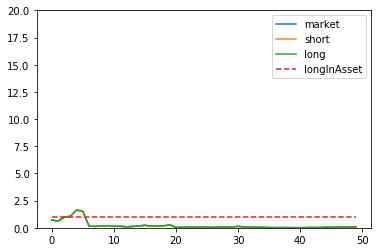

2637705.0983722033 479728.4288658181 24975008.141877767 2637705.0983722033 41608.28409051694


In [44]:
exchange = future_exchange(r=0.5, l=0.85)

x = []
p = []
p_short = []
p_long = []
p_longInAsset = []
new_p = 1

for i in range(0, 50):
    x.append(i)

    #new_p = 1.0 * random.randint(1, 1000000) / 1000
    percent = random.gauss(0.1, 0.4)
    if percent <= -1:
        percent = -0.99
    new_p = new_p * (1.0 + percent)

    exchange.openLong(abs(random.gauss(100000, 10000)))
    exchange.openShort(abs(random.gauss(50000, 5000)))
    exchange.closeLong(abs(random.gauss(50000, 10000)))
    exchange.closeShort(abs(random.gauss(50000, 10000)))
    exchange.addLiquidity(abs(random.gauss(1000000, 100000)))
    exchange.removeLiquidity(abs(random.gauss(500000, 100000)))

    exchange.updateRate(new_p)
    
    exchange.remargin()
    
    p.append(new_p)
    p_long.append(exchange.longRate())
    p_short.append(exchange.shortRate())
    p_longInAsset.append(exchange.longRateInAsset())

fig, ax = plt.subplots() 
ax.plot(x, p, label='market')
ax.plot(x, p_short, label='short')
ax.plot(x, p_long, label='long')
ax.plot(x, p_longInAsset, '--', label='longInAsset')
ax.set_ylim([0,20])
plt.legend()
plt.show()
print(exchange.D_1,exchange.D_2,exchange.D_3,exchange.S_1,exchange.S_2)

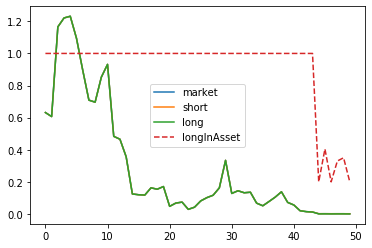

506923.3490394274 6421641.478877024 22605348.438829318 2534616.745197137 8080.463621960558


In [186]:
exchange = future_exchange(r=0.2, l=0.85)

x = []
p = []
p_short = []
p_long = []
p_longInAsset = []
new_p = 1

for i in range(0, 50):
    x.append(i)

    #new_p = 1.0 * random.randint(1, 1000000) / 1000
    percent = random.gauss(0.1, 0.4)
    if percent <= -1:
        percent = -0.99
    new_p = new_p * (1.0 + percent)

    exchange.openLong(abs(random.gauss(100000, 10000)))
    exchange.openShort(abs(random.gauss(50000, 5000)))
    exchange.closeLong(abs(random.gauss(50000, 10000)))
    exchange.closeShort(abs(random.gauss(50000, 10000)))
    exchange.addLiquidity(abs(random.gauss(1000000, 100000)))
    exchange.removeLiquidity(abs(random.gauss(500000, 100000)))

    exchange.updateRate(new_p)
    
    exchange.remargin()
    
    p.append(new_p)
    p_long.append(exchange.longRate())
    p_short.append(exchange.shortRate())
    p_longInAsset.append(exchange.longRateInAsset())

plt.plot(x, p, label='market')
plt.plot(x, p_short, label='short')
plt.plot(x, p_long, label='long')
plt.plot(x, p_longInAsset, '--', label='longInAsset')
plt.legend()
plt.show()
print(exchange.D_1,exchange.D_2,exchange.D_3,exchange.S_1,exchange.S_2)

Enough D3 for D2	Enough D3 for D1	 1753
Enough D3 for D2	NOT enough D3 for D1	 47
NOT enough D3 for D2	Enough D1 for D2	 39
NOT enough D3 for D2	NOT enough D1 for D2	 311


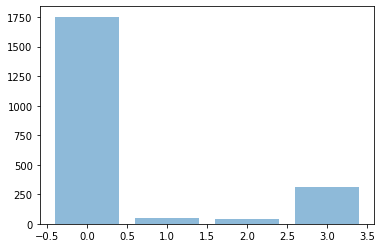

In [45]:
plt.bar([0,1,2,3], exchange.c, align='center', alpha=0.5)
sum(exchange.c)
print("Enough D3 for D2\tEnough D3 for D1\t", exchange.c[0])
print("Enough D3 for D2\tNOT enough D3 for D1\t", exchange.c[1])
print("NOT enough D3 for D2\tEnough D1 for D2\t", exchange.c[2])
print("NOT enough D3 for D2\tNOT enough D1 for D2\t", exchange.c[3])